##Tiny NeRF
This is a simplied version of the method presented in *NeRF: Representing Scenes as Neural Radiance Fields for View Synthesis*

[Project Website](http://www.matthewtancik.com/nerf)

[arXiv Paper](https://arxiv.org/abs/2003.08934)

[Full Code](github.com/bmild/nerf)

Components not included in the notebook
*   5D input including view directions
*   Hierarchical Sampling



In [6]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

# Removed the line that tries to force TensorFlow 1.x
#if IN_COLAB:
#    %tensorflow_version 1.x

#Import tensorflow
import tensorflow as tf
#Enable eager execution for TensorFlow 2.x
tf.compat.v1.enable_eager_execution()

from tqdm import tqdm_notebook as tqdm
import numpy as np
import matplotlib.pyplot as plt

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
# Check Tinynerf folder
tinynerf_dir = '/content/drive/MyDrive/DESMAI_TALIYAJOSEPH_2025/Tinynerf'
print("Contents of Tinynerf directory:")
!ls {tinynerf_dir}

Contents of Tinynerf directory:
Blenderllff_TF	tiny_nerf.ipynb


In [29]:
from google.colab import drive
import os
import numpy as np
from PIL import Image

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Specify Image Folder Path
image_folder = r"/content/drive/MyDrive/DESMAI_TALIYAJOSEPH_2025/Tinynerf/Blenderllff_TF"

# Debugging: Check if the folder exists
if not os.path.exists(image_folder):
    print("The specified folder does not exist.")
else:
    print("Folder exists.")

# Load and Process Images
print(f"Image folder path: '{image_folder}' Length: {len(image_folder)}")  # Debugging output
all_files = os.listdir(image_folder)
print("All files in the folder:", all_files)

# Filter for PNG files
image_filenames = [f for f in all_files if f.endswith('.png')]
print("Number of PNG images found:", len(image_filenames))

images = []
for filename in image_filenames:
    img_path = os.path.join(image_folder, filename)
    try:
        img = Image.open(img_path).convert("RGB")
        images.append(np.array(img))
    except Exception as e:
        print(f"Error loading {img_path}: {e}")

if images:
    images = np.stack(images, axis=0)
    print("Images shape:", images.shape)
else:
    print("No valid images loaded.")

# Camera Poses and Focal Length
poses = np.random.rand(100, 4, 4)  # Replace with your actual poses
focal = 138.8892067803277

# Save as .npz File
output_path = r"/content/drive/MyDrive/DESMAI_TALIYAJOSEPH_2025/my_custom_dataset.npz"
np.savez_compressed(output_path, images=images, poses=poses, focal=focal)

print("Dataset saved as my_custom_dataset.npz in", output_path)

Mounted at /content/drive
Folder exists.
Image folder path: '/content/drive/MyDrive/DESMAI_TALIYAJOSEPH_2025/Tinynerf/Blenderllff_TF' Length: 71
All files in the folder: ['image_0000.png', 'image_0003.png', 'image_0001.png', 'image_0002.png', 'image_0004.png', 'image_0048.png', 'image_0049.png', 'image_0047.png', 'image_0046.png', 'image_0045.png', 'image_0041.png', 'image_0040.png', 'image_0043.png', 'image_0042.png', 'image_0044.png', 'image_0039.png', 'image_0038.png', 'image_0034.png', 'image_0037.png', 'image_0031.png', 'image_0036.png', 'image_0030.png', 'image_0032.png', 'image_0035.png', 'image_0033.png', 'image_0029.png', 'image_0028.png', 'image_0027.png', 'image_0024.png', 'image_0026.png', 'image_0015.png', 'image_0022.png', 'image_0023.png', 'image_0021.png', 'image_0020.png', 'image_0025.png', 'image_0019.png', 'image_0016.png', 'image_0017.png', 'image_0018.png', 'image_0012.png', 'image_0010.png', 'image_0013.png', 'image_0011.png', 'image_0014.png', 'image_0009.png', '

In [ ]:
import numpy as np
import os

# Specify the path to your custom dataset
dataset_path = r"/content/drive/MyDrive/DESMAI_TALIYAJOSEPH_2025/my_custom_dataset.npz"

# Check if the file exists
if not os.path.exists(dataset_path):
    print("Custom dataset does not exist at the specified path.")
else:
    print("Loading custom dataset...")

    # Load the NPZ file
    data = np.load(dataset_path)

    # Access the arrays stored in the NPZ file
    images = data['images']
    poses = data['poses']
    focal = data['focal']

    print("Images shape:", images.shape)
    print("Poses shape:", poses.shape)
    print("Focal length:", focal)

In [7]:
#import os
#if not os.path.exists('tiny_nerf_data.npz'):
    #!wget http://cseweb.ucsd.edu/~viscomp/projects/LF/papers/ECCV20/nerf/tiny_nerf_data.npz

--2025-02-17 11:59:01--  http://cseweb.ucsd.edu/~viscomp/projects/LF/papers/ECCV20/nerf/tiny_nerf_data.npz
Resolving cseweb.ucsd.edu (cseweb.ucsd.edu)... 132.239.8.30
Connecting to cseweb.ucsd.edu (cseweb.ucsd.edu)|132.239.8.30|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cseweb.ucsd.edu//~viscomp/projects/LF/papers/ECCV20/nerf/tiny_nerf_data.npz [following]
--2025-02-17 11:59:01--  https://cseweb.ucsd.edu//~viscomp/projects/LF/papers/ECCV20/nerf/tiny_nerf_data.npz
Connecting to cseweb.ucsd.edu (cseweb.ucsd.edu)|132.239.8.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12727482 (12M)
Saving to: ‘tiny_nerf_data.npz’

tiny_nerf_data.npz  100%[===================>]  12.14M  31.7MB/s    in 0.4s    

2025-02-17 11:59:02 (31.7 MB/s) - ‘tiny_nerf_data.npz’ saved [12727482/12727482]



In [8]:
import os
import numpy as np

if not os.path.exists('tiny_nerf_data.npz'):
    !wget http://cseweb.ucsd.edu/~viscomp/projects/LF/papers/ECCV20/nerf/tiny_nerf_data.npz

# Now you can load the data
data = np.load('tiny_nerf_data.npz')

Image shape: (106, 100, 100, 3)
Poses shape: (106, 4, 4)
Focal length: 138.88887889922103


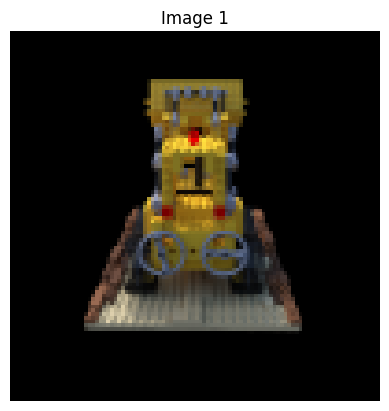

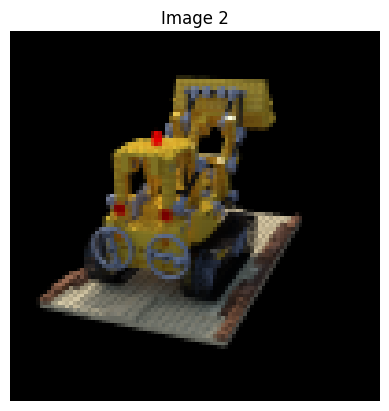

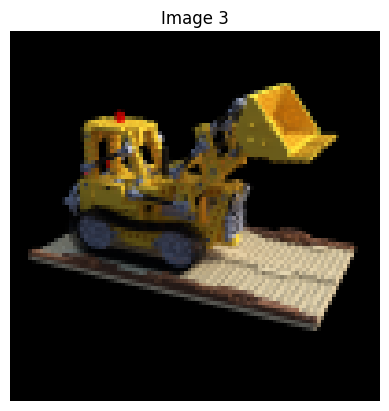

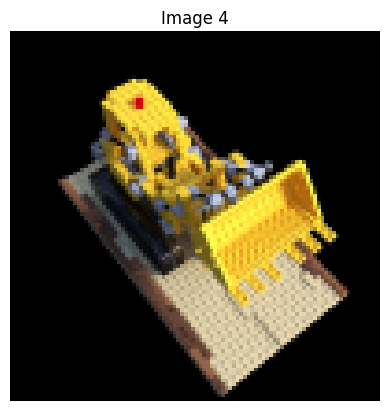

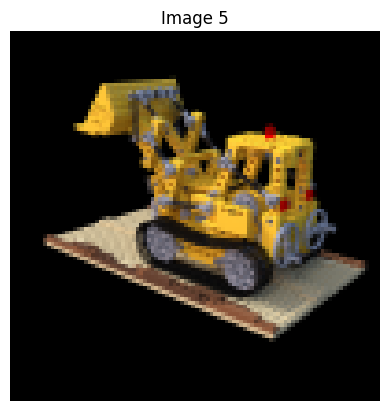

In [16]:
import matplotlib.pyplot as plt

# Access images, poses, and focal length from the loaded data
images = data['images']
poses = data['poses']
focal = data['focal']

# Print information about the dataset
print("Image shape:", images.shape)  # Shape of the images array
print("Poses shape:", poses.shape)    # Shape of the poses array
print("Focal length:", focal)         # Value of the focal length

# Display a few sample images from the dataset
num_images_to_display = 5  # Number of images to display

for i in range(num_images_to_display):
    plt.figure()
    plt.imshow(images[i])
    plt.title(f"Image {i + 1}")
    plt.axis('off')  # Turn off axis labels
    plt.show()

# Load Input Images and Poses

(106, 100, 100, 3) (106, 4, 4) 138.88887889922103


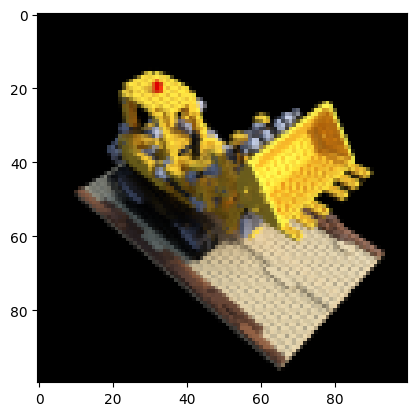

In [9]:
data = np.load('tiny_nerf_data.npz')
images = data['images']
poses = data['poses']
focal = data['focal']
H, W = images.shape[1:3]
print(images.shape, poses.shape, focal)

testimg, testpose = images[101], poses[101]
images = images[:100,...,:3]
poses = poses[:100]

plt.imshow(testimg)
plt.show()

# Optimize NeRF

In [10]:


def posenc(x):
  rets = [x]
  for i in range(L_embed):
    for fn in [tf.sin, tf.cos]:
      rets.append(fn(2.**i * x))
  return tf.concat(rets, -1)

L_embed = 6
embed_fn = posenc
# L_embed = 0
# embed_fn = tf.identity

def init_model(D=8, W=256):
    relu = tf.keras.layers.ReLU()
    dense = lambda W=W, act=relu : tf.keras.layers.Dense(W, activation=act)

    inputs = tf.keras.Input(shape=(3 + 3*2*L_embed,))
    outputs = inputs
    for i in range(D):
        outputs = dense()(outputs)
        if i%4==0 and i>0:
            outputs = tf.keras.layers.concatenate([outputs, inputs], axis=-1)
    outputs = dense(4, act=None)(outputs)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model


def get_rays(H, W, focal, c2w):
    i, j = tf.meshgrid(tf.range(W, dtype=tf.float32), tf.range(H, dtype=tf.float32), indexing='xy')
    dirs = tf.stack([(i-W*.5)/focal, -(j-H*.5)/focal, -tf.ones_like(i)], -1)
    rays_d = tf.reduce_sum(dirs[..., np.newaxis, :] * c2w[:3,:3], -1)
    rays_o = tf.broadcast_to(c2w[:3,-1], tf.shape(rays_d))
    return rays_o, rays_d



def render_rays(network_fn, rays_o, rays_d, near, far, N_samples, rand=False):

    def batchify(fn, chunk=1024*32):
        return lambda inputs : tf.concat([fn(inputs[i:i+chunk]) for i in range(0, inputs.shape[0], chunk)], 0)

    # Compute 3D query points
    z_vals = tf.linspace(near, far, N_samples)
    if rand:
      z_vals += tf.random.uniform(list(rays_o.shape[:-1]) + [N_samples]) * (far-near)/N_samples
    pts = rays_o[...,None,:] + rays_d[...,None,:] * z_vals[...,:,None]

    # Run network
    pts_flat = tf.reshape(pts, [-1,3])
    pts_flat = embed_fn(pts_flat)
    raw = batchify(network_fn)(pts_flat)
    raw = tf.reshape(raw, list(pts.shape[:-1]) + [4])

    # Compute opacities and colors
    sigma_a = tf.nn.relu(raw[...,3])
    rgb = tf.math.sigmoid(raw[...,:3])

    # Do volume rendering
    dists = tf.concat([z_vals[..., 1:] - z_vals[..., :-1], tf.broadcast_to([1e10], z_vals[...,:1].shape)], -1)
    alpha = 1.-tf.exp(-sigma_a * dists)
    weights = alpha * tf.math.cumprod(1.-alpha + 1e-10, -1, exclusive=True)

    rgb_map = tf.reduce_sum(weights[...,None] * rgb, -2)
    depth_map = tf.reduce_sum(weights * z_vals, -1)
    acc_map = tf.reduce_sum(weights, -1)

    return rgb_map, depth_map, acc_map

Here we optimize the model. We plot a rendered holdout view and its PSNR every 50 iterations.

0 0.11293609619140625 secs per iter


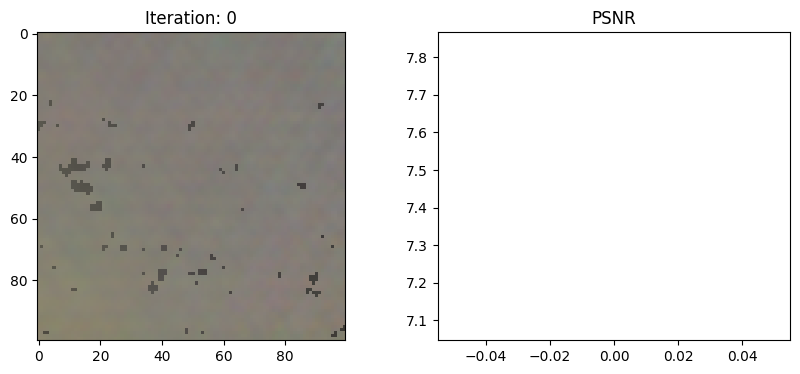

25 0.7250811862945556 secs per iter


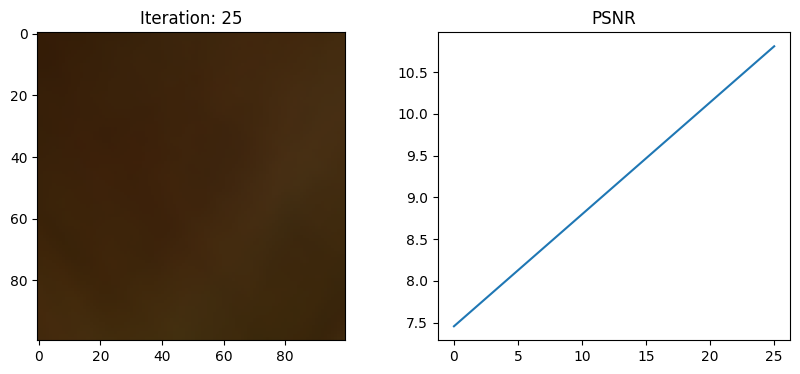

50 0.7363056468963624 secs per iter


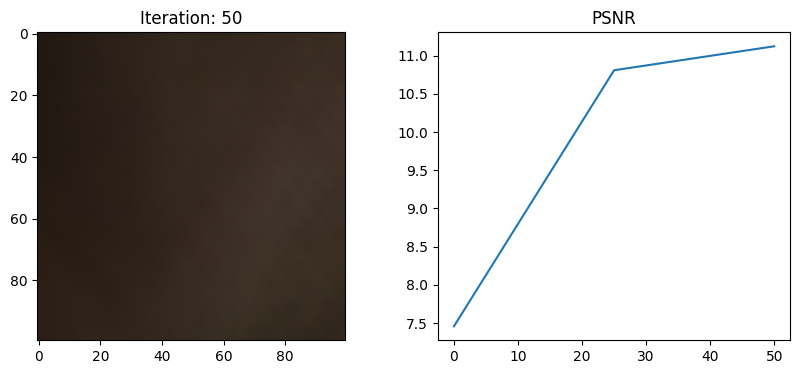

75 0.7657343959808349 secs per iter


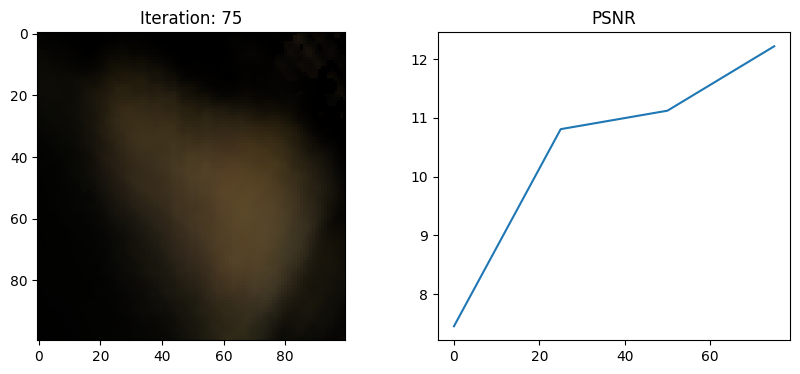

100 0.8100124740600586 secs per iter


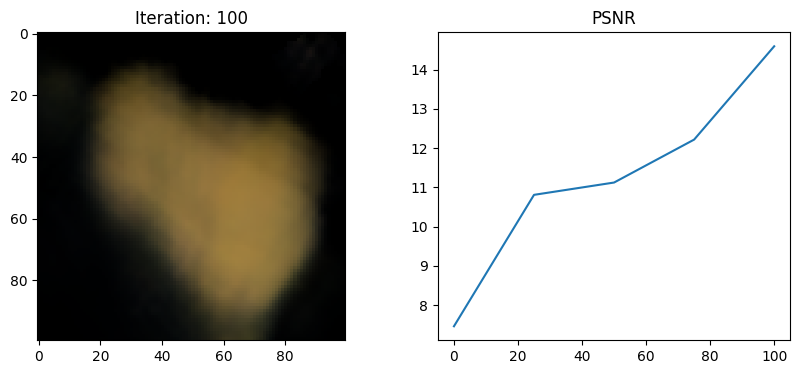

125 0.7735878562927246 secs per iter


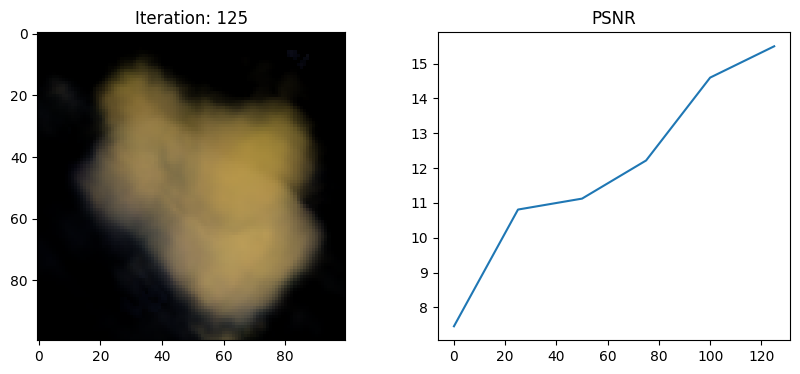

150 0.7444854259490967 secs per iter


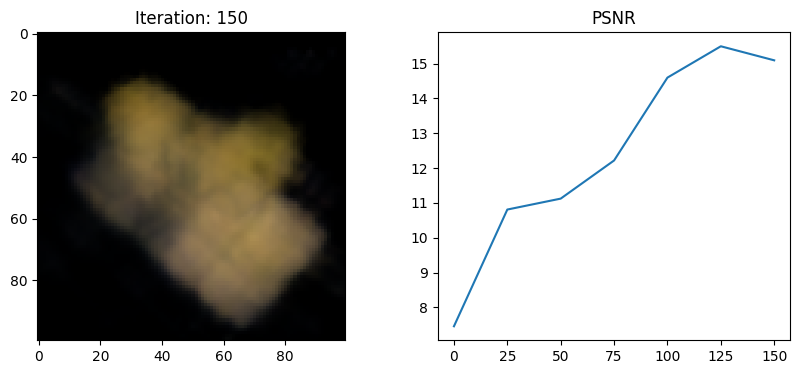

175 0.7302986049652099 secs per iter


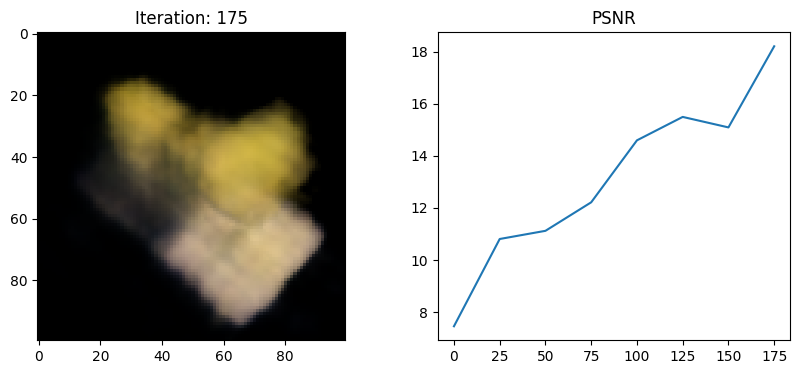

200 0.7418984699249268 secs per iter


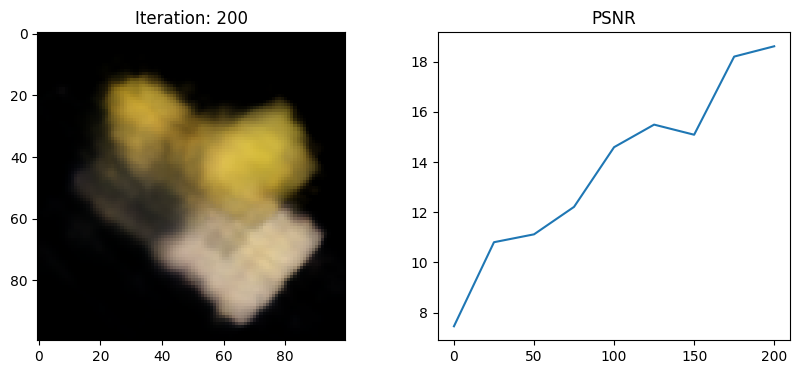

225 0.7455430793762207 secs per iter


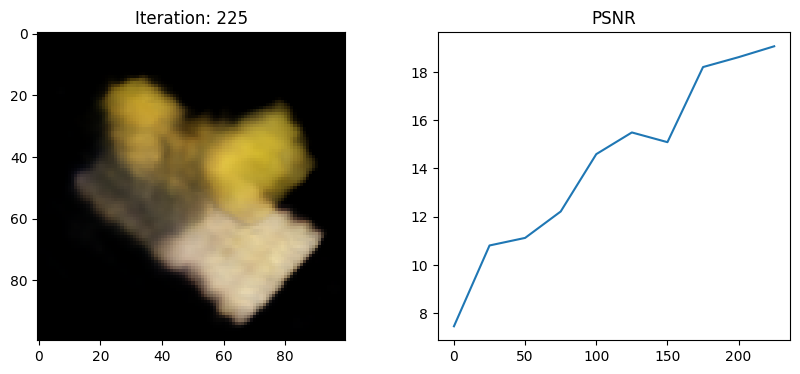

250 0.7477701282501221 secs per iter


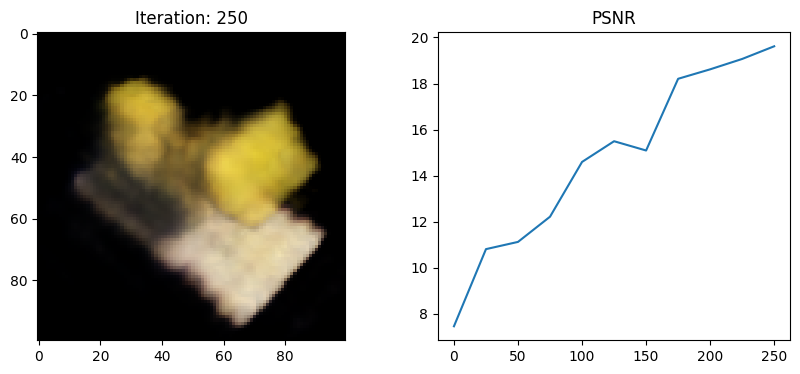

275 0.7446797657012939 secs per iter


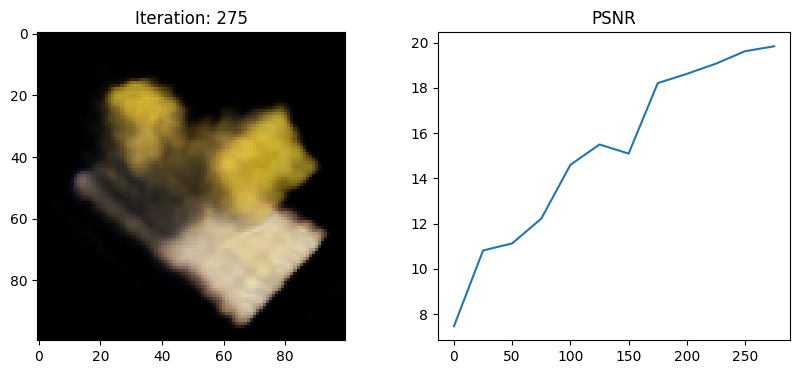

300 0.7360034370422364 secs per iter


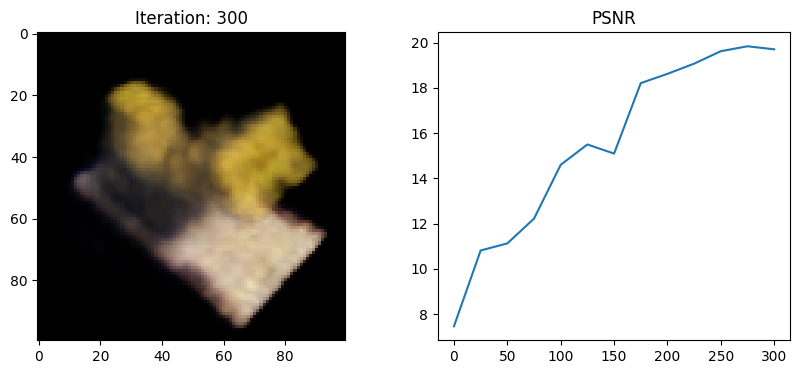

325 0.7407760906219483 secs per iter


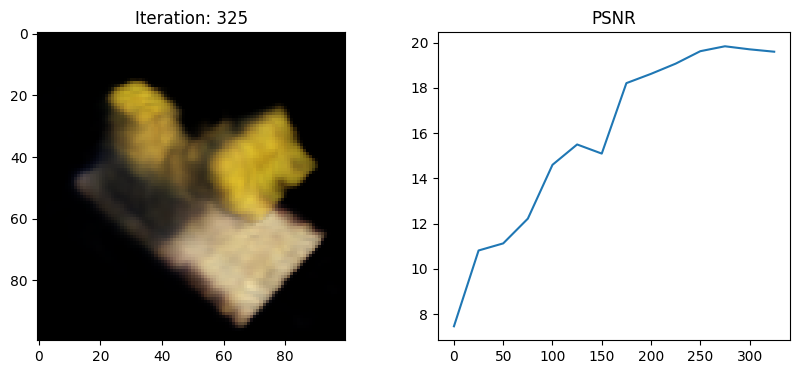

350 0.7382305049896241 secs per iter


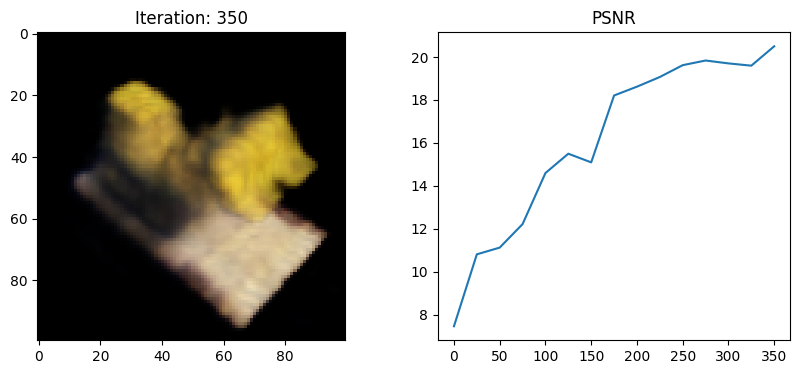

375 0.7525836372375488 secs per iter


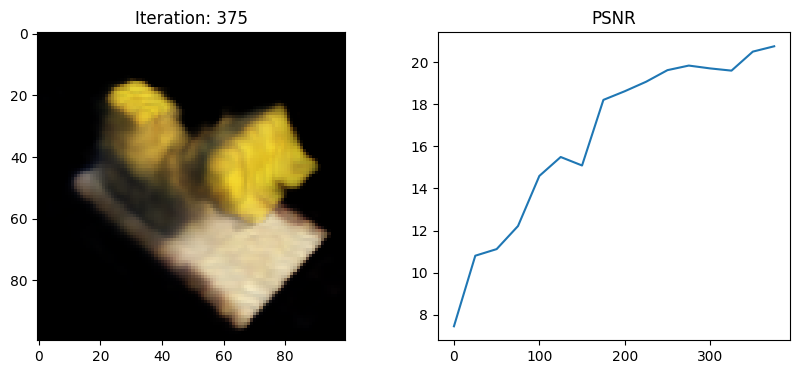

400 0.738167028427124 secs per iter


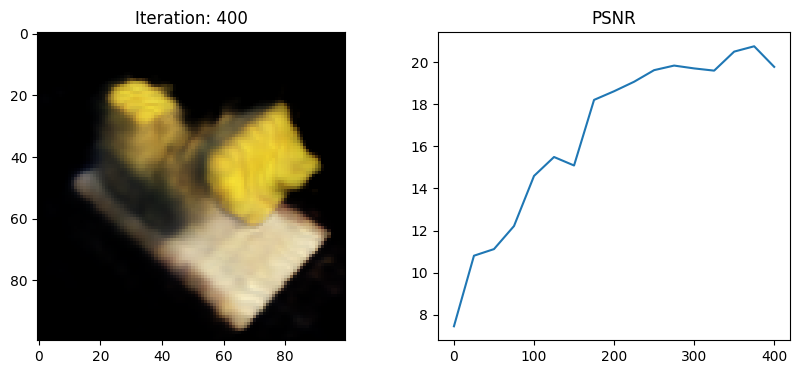

425 0.7427863311767579 secs per iter


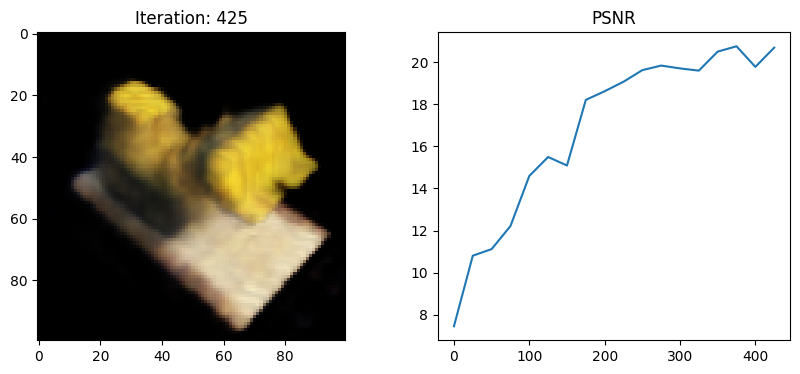

450 0.732530632019043 secs per iter


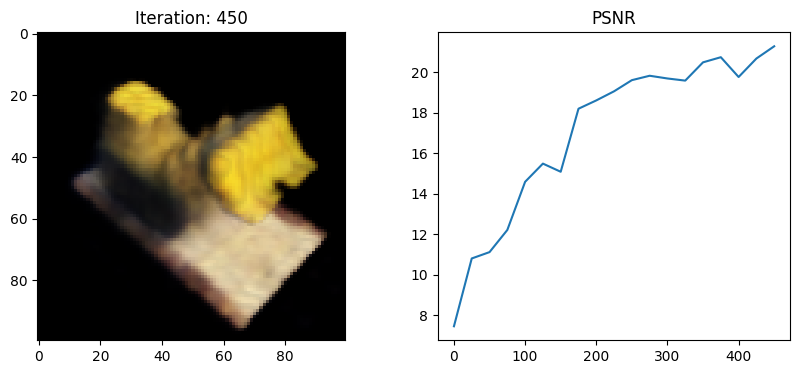

475 0.7400119876861573 secs per iter


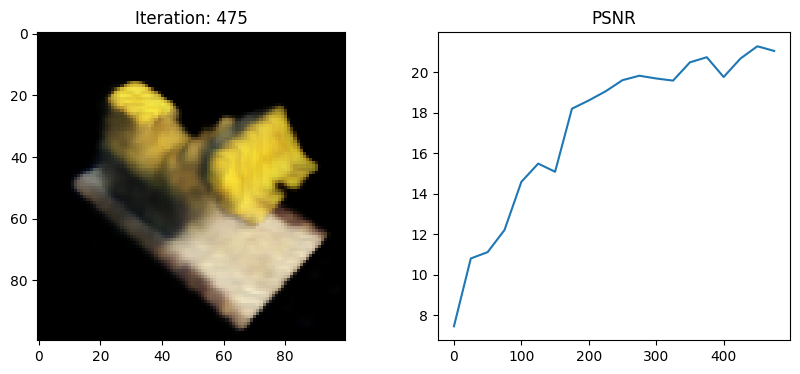

500 0.7411468982696533 secs per iter


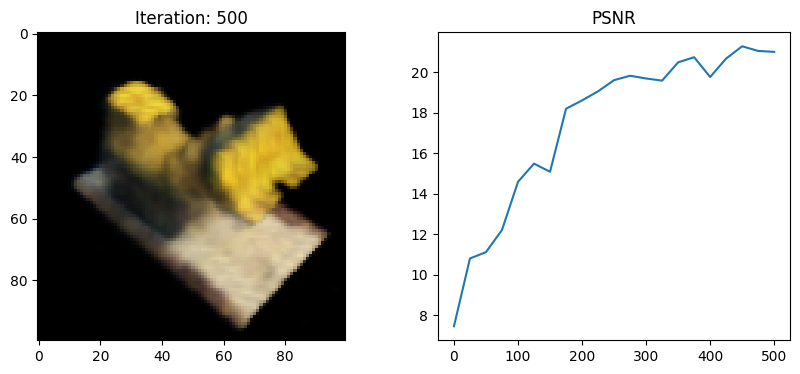

525 0.7327188777923584 secs per iter


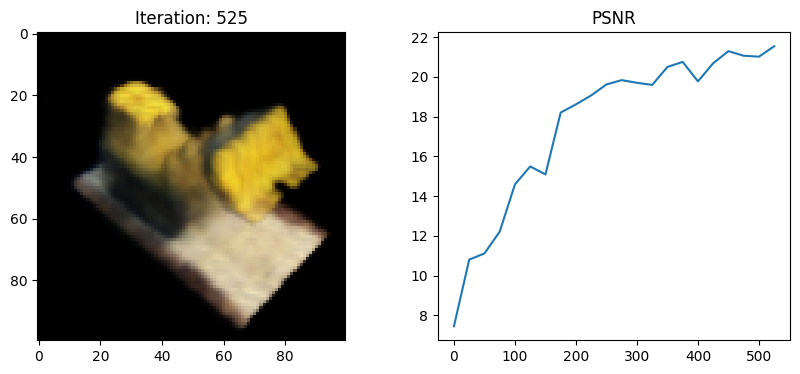

550 0.7378818130493164 secs per iter


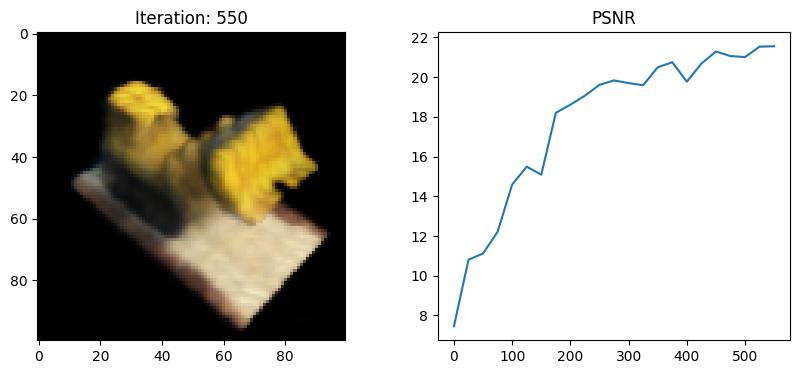

575 0.7327504348754883 secs per iter


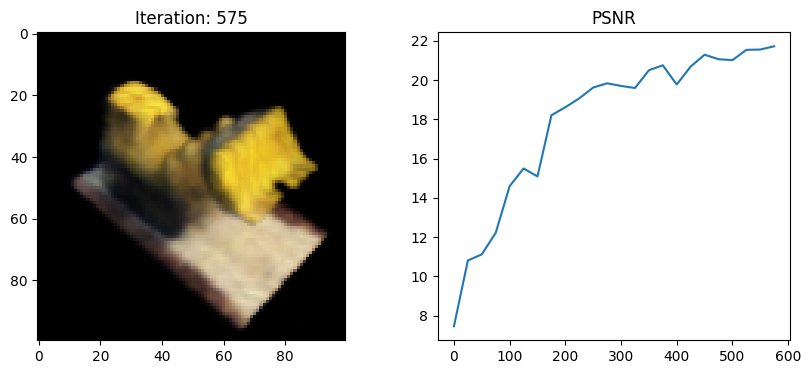

600 0.7392904663085937 secs per iter


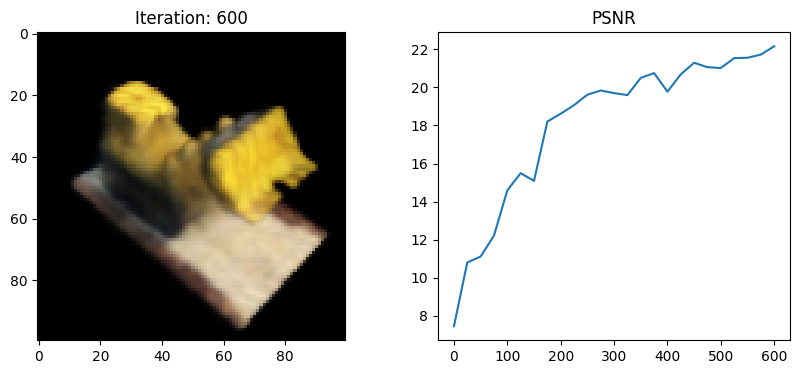

625 0.7344704532623291 secs per iter


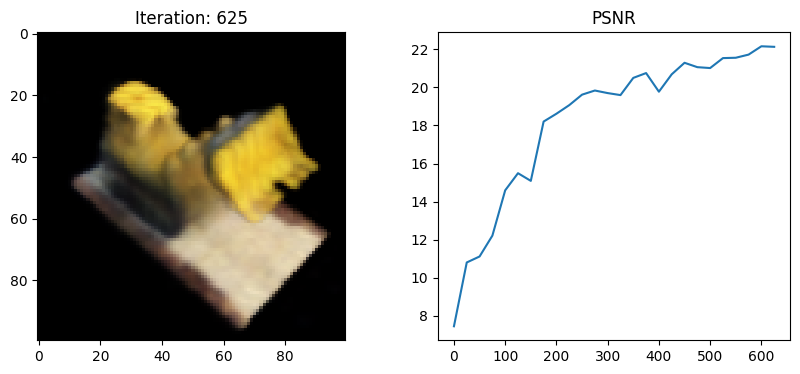

650 0.7465084362030029 secs per iter


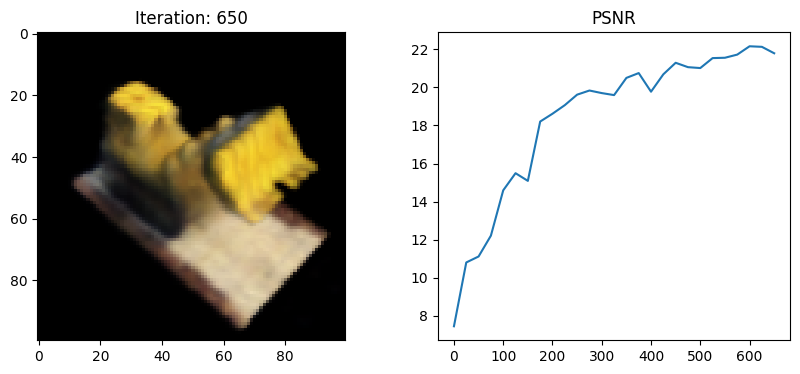

675 0.7315629291534423 secs per iter


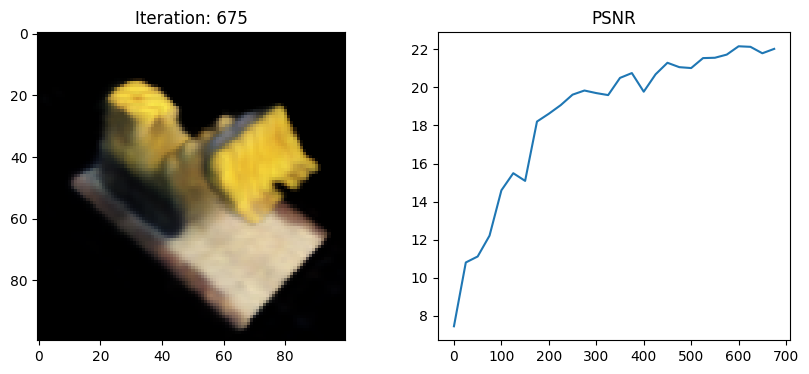

700 0.7402525615692138 secs per iter


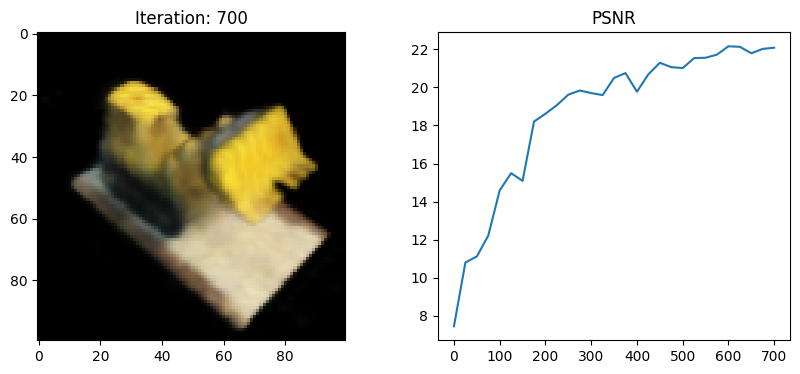

725 0.7327576160430909 secs per iter


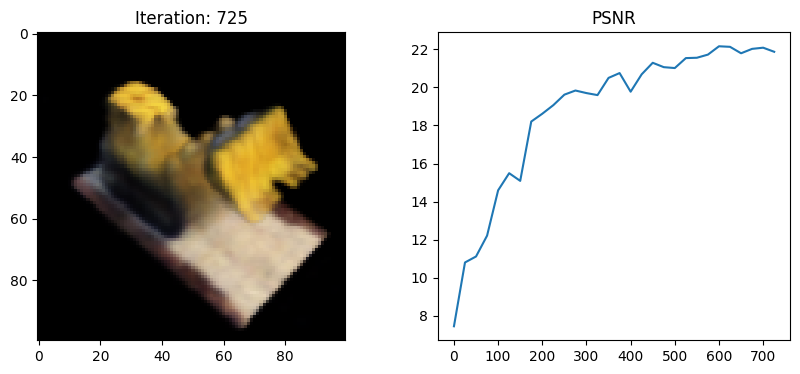

750 0.7427395057678222 secs per iter


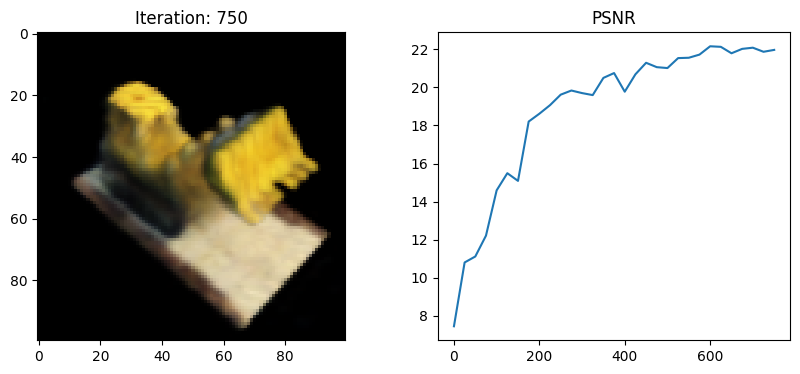

775 0.7338377571105957 secs per iter


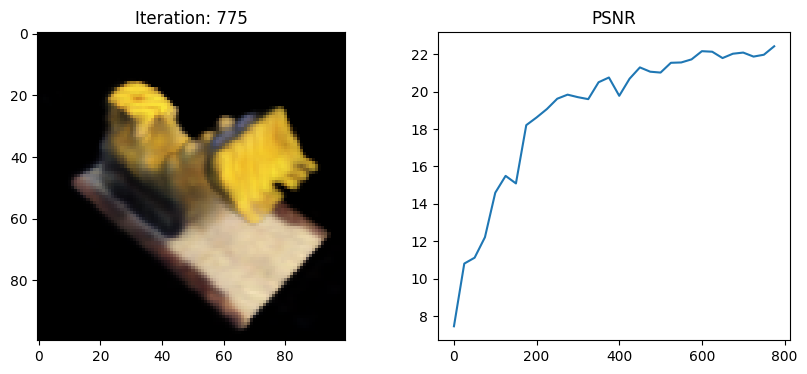

800 0.7391128253936767 secs per iter


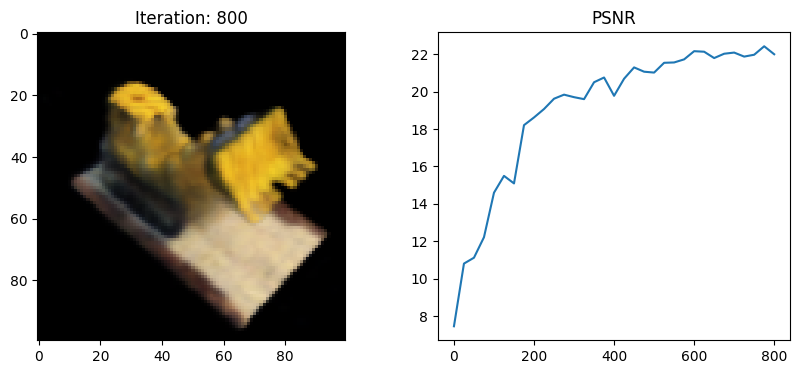

825 0.7388256931304932 secs per iter


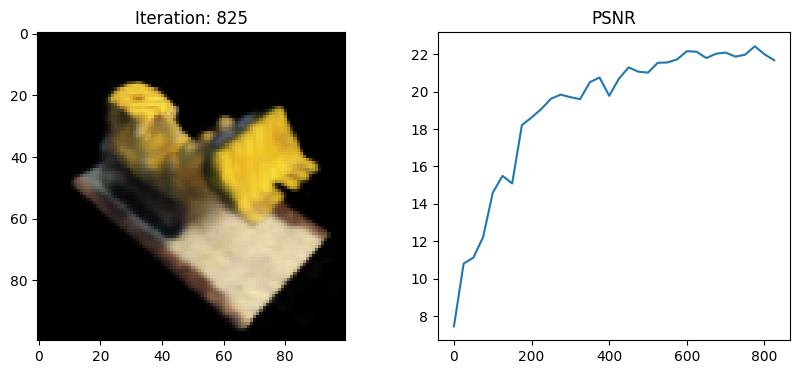

850 0.730273790359497 secs per iter


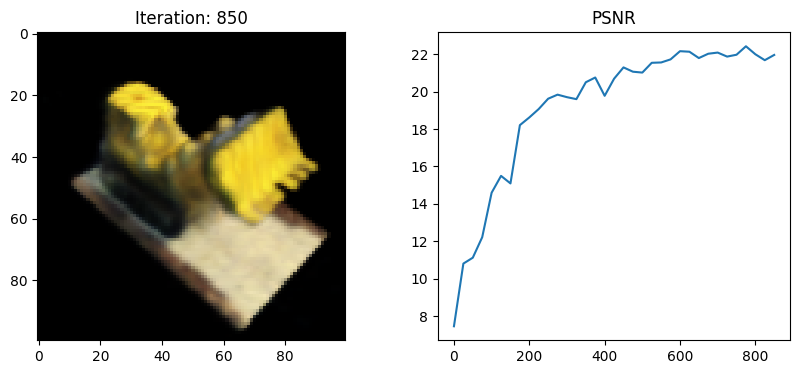

875 0.7382275772094726 secs per iter


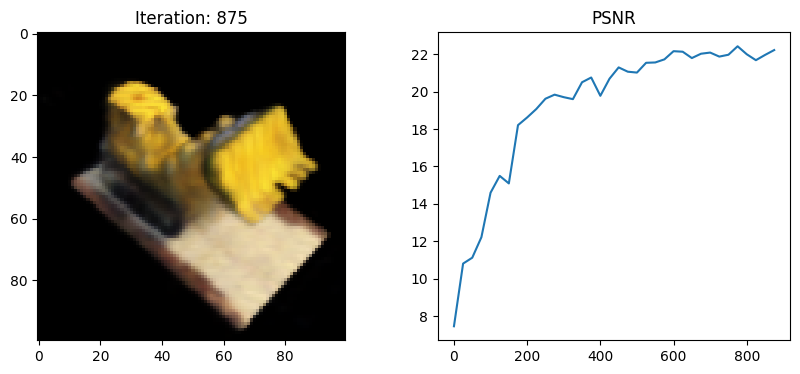

900 0.7312198925018311 secs per iter


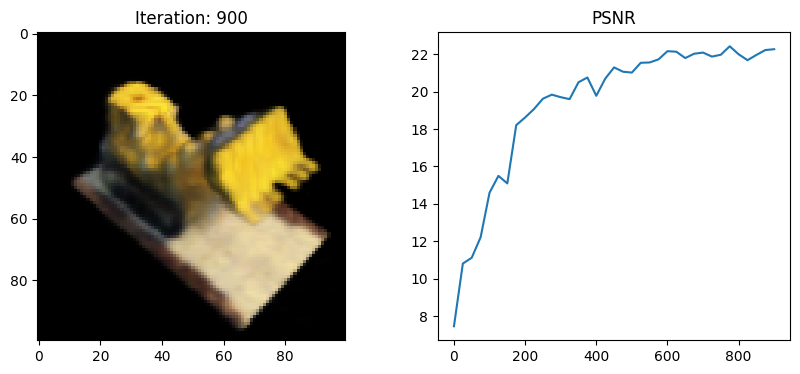

925 0.7420626163482666 secs per iter


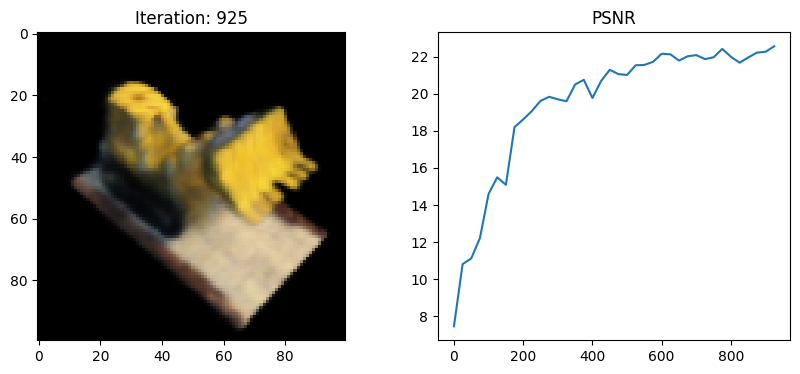

950 0.7310208892822265 secs per iter


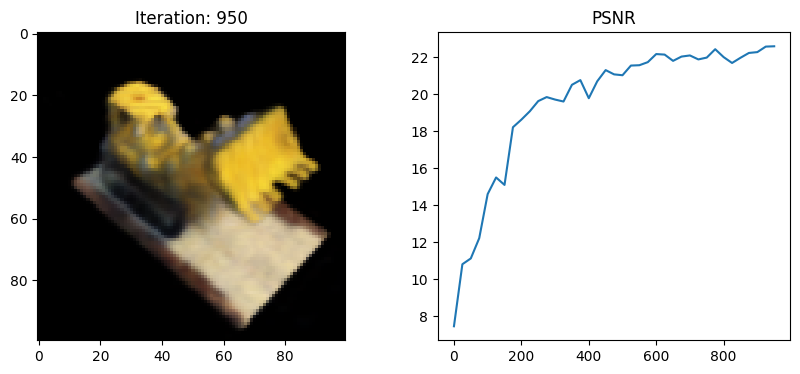

975 0.7362110233306884 secs per iter


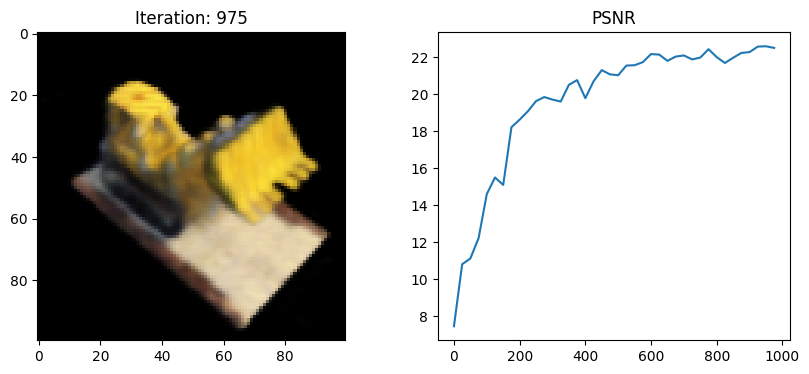

1000 0.7314072799682617 secs per iter


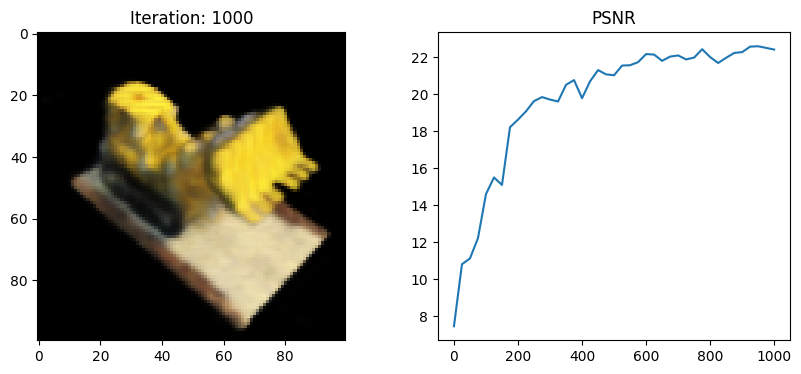

Done


In [11]:
model = init_model()
optimizer = tf.keras.optimizers.Adam(5e-4)

N_samples = 64
N_iters = 1000
psnrs = []
iternums = []
i_plot = 25

import time
t = time.time()
for i in range(N_iters+1):

    img_i = np.random.randint(images.shape[0])
    target = images[img_i]
    pose = poses[img_i]
    rays_o, rays_d = get_rays(H, W, focal, pose)
    with tf.GradientTape() as tape:
        rgb, depth, acc = render_rays(model, rays_o, rays_d, near=2., far=6., N_samples=N_samples, rand=True)
        loss = tf.reduce_mean(tf.square(rgb - target))
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    if i%i_plot==0:
        print(i, (time.time() - t) / i_plot, 'secs per iter')
        t = time.time()

        # Render the holdout view for logging
        rays_o, rays_d = get_rays(H, W, focal, testpose)
        rgb, depth, acc = render_rays(model, rays_o, rays_d, near=2., far=6., N_samples=N_samples)
        loss = tf.reduce_mean(tf.square(rgb - testimg))
        psnr = -10. * tf.math.log(loss) / tf.math.log(10.)

        psnrs.append(psnr.numpy())
        iternums.append(i)

        plt.figure(figsize=(10,4))
        plt.subplot(121)
        plt.imshow(rgb)
        plt.title(f'Iteration: {i}')
        plt.subplot(122)
        plt.plot(iternums, psnrs)
        plt.title('PSNR')
        plt.show()

print('Done')

# Interactive Visualization

In [12]:
import tensorflow as tf
import numpy as np
%matplotlib inline
from ipywidgets import interactive, widgets


trans_t = lambda t : tf.convert_to_tensor([
    [1,0,0,0],
    [0,1,0,0],
    [0,0,1,t],
    [0,0,0,1],
], dtype=tf.float32)

rot_phi = lambda phi : tf.convert_to_tensor([
    [1,0,0,0],
    [0,tf.cos(phi),-tf.sin(phi),0],
    [0,tf.sin(phi), tf.cos(phi),0],
    [0,0,0,1],
], dtype=tf.float32)

rot_theta = lambda th : tf.convert_to_tensor([
    [tf.cos(th),0,-tf.sin(th),0],
    [0,1,0,0],
    [tf.sin(th),0, tf.cos(th),0],
    [0,0,0,1],
], dtype=tf.float32)


def pose_spherical(theta, phi, radius):
    c2w = trans_t(radius)
    c2w = rot_phi(phi/180.*np.pi) @ c2w
    c2w = rot_theta(theta/180.*np.pi) @ c2w
    c2w = np.array([[-1,0,0,0],[0,0,1,0],[0,1,0,0],[0,0,0,1]]) @ c2w
    return c2w


def f(**kwargs):
    c2w = pose_spherical(**kwargs)
    rays_o, rays_d = get_rays(H, W, focal, c2w[:3,:4])
    rgb, depth, acc = render_rays(model, rays_o, rays_d, near=2., far=6., N_samples=N_samples)
    img = np.clip(rgb,0,1)

    plt.figure(2, figsize=(20,6))
    plt.imshow(img)
    plt.show()


sldr = lambda v, mi, ma: widgets.FloatSlider(
    value=v,
    min=mi,
    max=ma,
    step=.01,
)

names = [
    ['theta', [100., 0., 360]],
    ['phi', [-30., -90, 0]],
    ['radius', [4., 3., 5.]],
]

interactive_plot = interactive(f, **{s[0] : sldr(*s[1]) for s in names})
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=100.0, description='theta', max=360.0, step=0.01), FloatSlider(value=-…

# Render 360 Video

In [13]:
frames = []
for th in tqdm(np.linspace(0., 360., 120, endpoint=False)):
    c2w = pose_spherical(th, -30., 4.)
    rays_o, rays_d = get_rays(H, W, focal, c2w[:3,:4])
    rgb, depth, acc = render_rays(model, rays_o, rays_d, near=2., far=6., N_samples=N_samples)
    frames.append((255*np.clip(rgb,0,1)).astype(np.uint8))

import imageio
f = 'video.mp4'
imageio.mimwrite(f, frames, fps=30, quality=7)

<ipython-input-13-bc28ed268829>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for th in tqdm(np.linspace(0., 360., 120, endpoint=False)):


  0%|          | 0/120 [00:00<?, ?it/s]

In [14]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('video.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls autoplay loop>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)